In [1]:
%load_ext sppl.magics
%matplotlib inline

In [2]:
%%sppl model
from sppl.sym_util import binspace
n = 4000
param ~= randint(low=250, high=350)
switch (param) cases (b in range(250, 350)):
    p ~= beta(a=277, b=b)
switch (p) cases (x in binspace(0, 1, 20)):
    votes ~= binom(n=n, p=(x.left + x.right)/2)
win ~= votes > 0.5*n

In [3]:
n = %sppl_get_namespace model
model_win = n.model.condition(n.win << {1})
model_lose = n.model.condition(n.win << {0})

In [4]:
xs = range(250, 350)
param_prior = [n.model.prob(n.param << {i}) for i in xs]
param_posterior_win = [model_win.prob(n.param << {i}) for i in xs]
param_posterior_lose = [model_lose.prob(n.param << {i}) for i in xs]

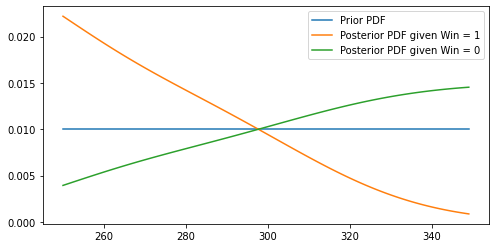

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(xs, param_prior, label='Prior PDF')
ax.plot(xs, param_posterior_win, label='Posterior PDF given Win = 1')
ax.plot(xs, param_posterior_lose, label='Posterior PDF given Win = 0')
ax.legend(loc='upper right')
fig.set_size_inches(8,4)